In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")

In [86]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd1fd2e908>]],
      dtype=object)

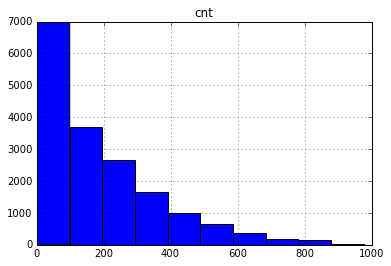

In [87]:
bike_rentals.hist(column = "cnt")

In [88]:
bike_rentals.corr()[["cnt"]]

,cnt
instant,0.278379
season,0.178056
yr,0.250495
mnth,0.120638
hr,0.394071
holiday,-0.030927
weekday,0.026900
workingday,0.030284
weathersit,-0.142426
temp,0.404772


In [89]:
def assign_label(hour):
    if (hour >= 0 and hour < 6):
        return 4
    elif (hour >= 6 and hour < 12):
        return 1
    elif (hour >= 12 and hour < 18):
        return 2
    else:
        return 3
    

In [90]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [91]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [92]:
bike_rentals.groupby("time_label").count()[["cnt"]]

,cnt
time_label,
1,4360
2,4375
3,4368
4,4276


In [93]:
bike_rentals = bike_rentals.sample(frac=1, random_state=1).reset_index()

In [94]:
bike_rentals.head(5)

,index,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,15652,15653,2012-10-19,4,1,10,9,0,5,1,2,0.54,0.5152,0.94,0.1045,26,363,389,1
1,3085,3086,2011-05-13,2,0,5,11,0,5,1,2,0.52,0.5000,0.83,0.1642,56,90,146,1
2,1684,1685,2011-03-15,1,0,3,19,0,2,1,2,0.34,0.3182,0.71,0.2836,14,138,152,3
3,10555,10556,2012-03-20,1,1,3,22,0,2,1,1,0.54,0.5152,0.77,0.0000,32,156,188,3
4,14622,14623,2012-09-06,3,1,9,11,0,4,1,3,0.70,0.6667,0.84,0.1642,10,52,62,1


In [95]:
train_max_size = 0.8 * len(bike_rentals)
train = bike_rentals.loc[:train_max_size]
test = bike_rentals.loc[train_max_size:]

In [96]:
train.shape

(13904, 19)

In [97]:
test.shape

(3475, 19)

In [98]:
features = bike_rentals.columns.drop(["cnt", "casual", "dteday", "registered"])

In [99]:
# train using LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(train[features], train["cnt"])
predictions = model.predict(test[features])

mse = mean_squared_error(predictions, test["cnt"])

print(mse)


17056.883261307543


In [119]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(min_samples_leaf=10)

model.fit(train[features], train["cnt"])
predictions = model.predict(test[features])

mse = mean_squared_error(predictions, test["cnt"])

print(mse)

2701.032232659755


In [118]:
for i in range(2, 16, 2):
    model = DecisionTreeRegressor(min_samples_leaf=i)

    model.fit(train[features], train["cnt"])
    predictions = model.predict(test[features])

    mse = mean_squared_error(predictions, test["cnt"])

    print("min_sample_leaf = {} and mse = {}".format(i, mse))

min_sample_leaf = 2 and mse = 2957.5327577937646
min_sample_leaf = 4 and mse = 2799.250981865936
min_sample_leaf = 6 and mse = 2634.182742438949
min_sample_leaf = 8 and mse = 2665.300002562623
min_sample_leaf = 10 and mse = 2703.5171781969907
min_sample_leaf = 12 and mse = 2838.33580324983
min_sample_leaf = 14 and mse = 2859.236022597022


In [109]:
# best prediction is for min_sample_leaf = 8
# min_sample_leaf = 8 and mse = 2665.4538364758937


In [117]:
# check if the DecisionTree is overfitting
model = DecisionTreeRegressor(min_samples_leaf=10)

model.fit(train[features], train["cnt"])

train_predictions = model.predict(train[features])
train_mse = mean_squared_error(train_predictions, train["cnt"])
print(train_mse)


test_predictions = model.predict(test[features])
test_mse = mean_squared_error(test_predictions, test["cnt"])
print(test_mse)


1618.6560763558468
2699.3362033968488


In [129]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(min_samples_leaf=5)

model.fit(train[features], train["cnt"])
predictions = model.predict(test[features])

mse = mean_squared_error(predictions, test["cnt"])

print(mse)

2199.8591968941314


In [128]:
model = RandomForestRegressor(min_samples_leaf=10, max_depth=10)

model.fit(train[features], train["cnt"])

train_predictions = model.predict(train[features])
train_mse = mean_squared_error(train_predictions, train["cnt"])
print(train_mse)


test_predictions = model.predict(test[features])
test_mse = mean_squared_error(test_predictions, test["cnt"])
print(test_mse)


2153.023596148738
2913.115564097481
